# **Description:**
Этот набор данных охватывает мировые продажи BMW с 2010 по 2024 год, отражая годовые тенденции, рыночный спрос и изменения потребительских предпочтений. Он позволяет провести детальный анализ роста продаж, пиковых периодов и спадов, обусловленных экономическими факторами, развитием автомобильных технологий и популярностью электромобилей среди потребителей. Этот набор данных можно использовать для сравнения позиций BMW в сегменте автомобилей класса люкс, анализа региональных показателей и прогнозирования будущих тенденций продаж.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv("/content/drive/MyDrive/Обучение/Воркшоп: создание и запуск датасета/BMW sales data (2010-2024).csv")

In [8]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [10]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [11]:
df.isnull().sum()

,0
Model,0
Year,0
Region,0
Color,0
Fuel_Type,0
Transmission,0
Engine_Size_L,0
Mileage_KM,0
Price_USD,0
Sales_Volume,0


In [12]:
df.nunique().sort_values()

# уникальных значений в ячейке

,0
Transmission,2
Sales_Classification,2
Fuel_Type,4
Color,6
Region,6
Model,11
Year,15
Engine_Size_L,36
Sales_Volume,9845
Price_USD,38246


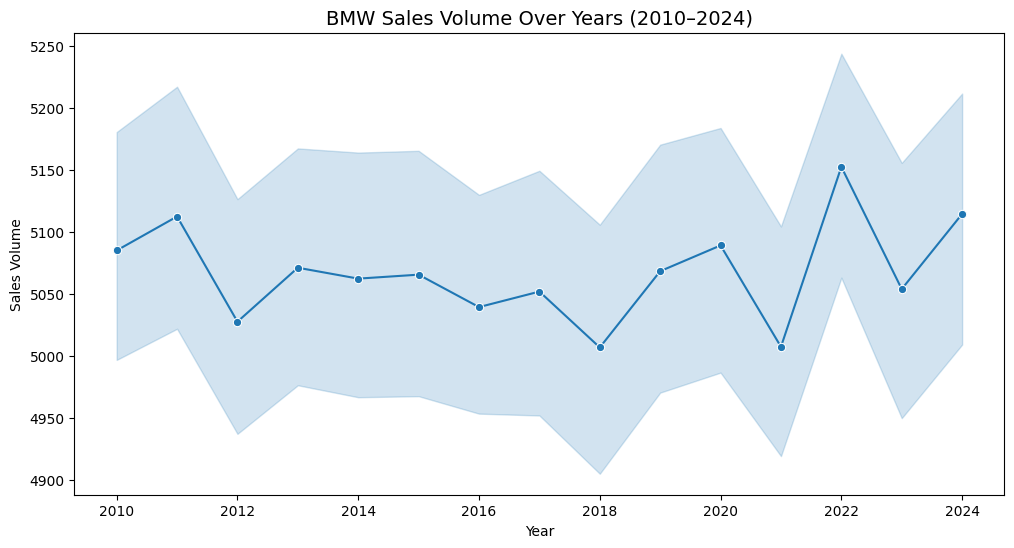

In [13]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="Year", y="Sales_Volume", marker="o")
plt.title("BMW Sales Volume Over Years (2010–2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Sales Volume")
plt.show()

# график объема продаж по годам. наблюдается спад продаж в 2012 году. а так же спад в 2021 году и затем рость в 2022 году

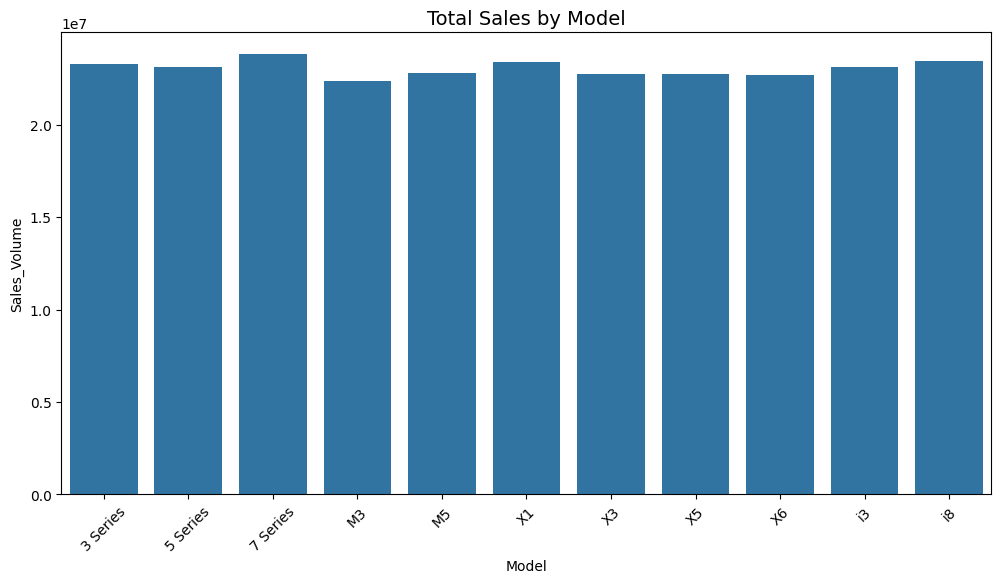

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby("Model")["Sales_Volume"].sum().reset_index(),
            x="Model", y="Sales_Volume")
plt.title("Total Sales by Model", fontsize=14)
plt.xticks(rotation=45)
plt.show()

# объем продаж по моделям, нет явного лидера продаж.

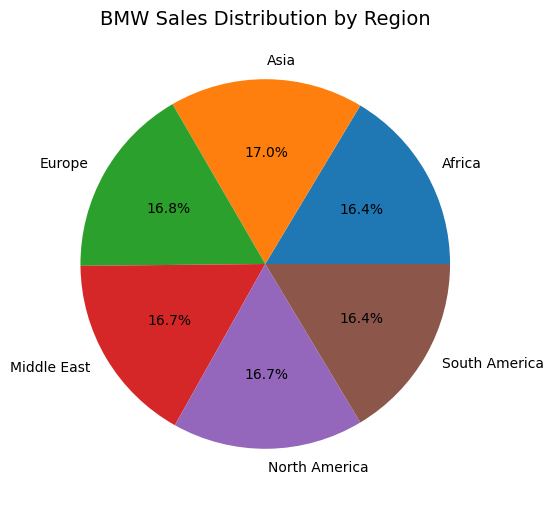

In [15]:
plt.figure(figsize=(10,6))
region_sales = df.groupby("Region")["Sales_Volume"].sum().reset_index()
plt.pie(region_sales["Sales_Volume"], labels=region_sales["Region"], autopct='%1.1f%%')
plt.title("BMW Sales Distribution by Region", fontsize=14)
plt.show()

# объем продаж по регионам, нет явного лидера, совсем немного лидирует Азия.

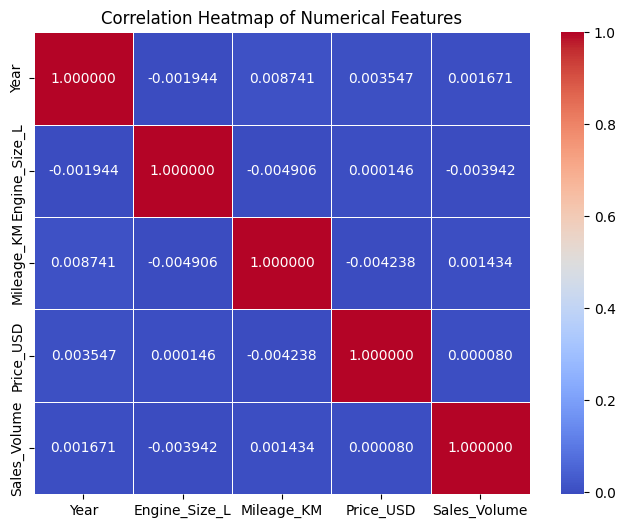

In [16]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".6f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# корреляция не прослеживается

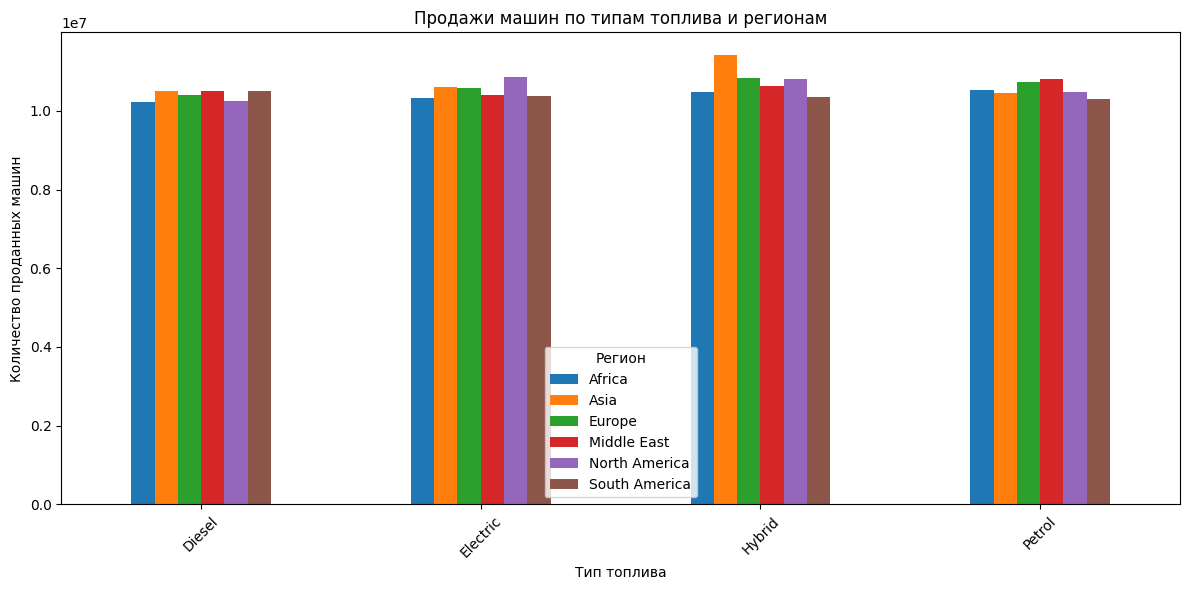

In [17]:
fuel_region_grouped = df.groupby(['Fuel_Type', 'Region'])['Sales_Volume'].sum().unstack(fill_value=0)

fuel_region_grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Продажи машин по типам топлива и регионам')
plt.xlabel('Тип топлива')
plt.ylabel('Количество проданных машин')
plt.legend(title='Регион')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# на диаграммме показаны продажи машин по типу топлива. Дизельные авто менее популярны в Африке, и Сев.Америке. Электро популярны в Сев.Америке. Гибриды наиболее популярны в Азии и менее популярны в Юж.Америке. Бензиновые остаются популярными в Европейской части и на Востоке.

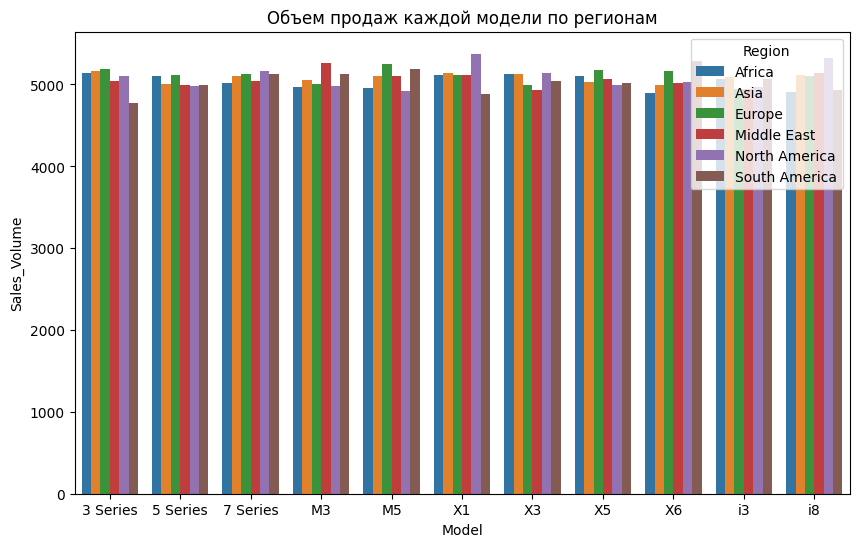

In [31]:
## Grouped Bar Plot: Average Sales Volume by Model and Region
grouped_data = df.groupby(['Model', 'Region'])['Sales_Volume'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Sales_Volume', hue='Region', data=grouped_data)
plt.title('Объем продаж каждой модели по регионам')
plt.show()

# по данному графику можно выявить наиболее популярные и менее популярные модели авто в каждом регионе. Например 3 серия авто менее популярна в Южной Америке, а наиболее популярная модель в Юж. Америке Х6, Х1 популярнее всего в Сев. Америке, так же как и i8.

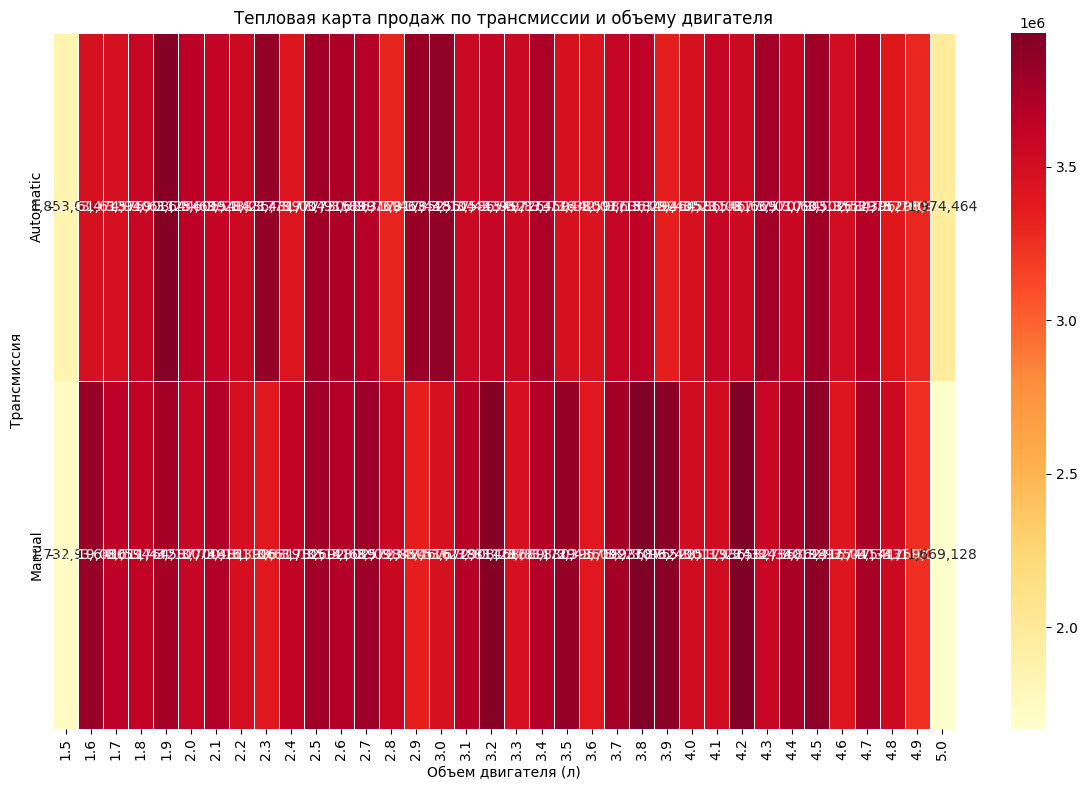

In [18]:
plt.figure(figsize=(12, 8))

pivot_table = df.pivot_table(
    values='Sales_Volume',
    index='Transmission',
    columns='Engine_Size_L',
    aggfunc='sum',
    fill_value=0
)

sns.heatmap(pivot_table, annot=True, fmt=',.0f', cmap='YlOrRd', linewidths=0.5)
plt.title('Тепловая карта продаж по трансмиссии и объему двигателя')
plt.xlabel('Объем двигателя (л)')
plt.ylabel('Трансмиссия')
plt.tight_layout()
plt.show()

In [19]:
grouped_data = df.groupby(['Transmission', 'Engine_Size_L']).agg({
    'Sales_Volume': 'sum',
    'Model': 'count',  # количество уникальных моделей
    'Price_USD': 'mean'  # средняя цена
}).reset_index()

grouped_data.columns = ['Transmission', 'Engine_Size_L', 'Total_Sales', 'Unique_Models', 'Average_Price']

# Находим комбинацию с максимальными продажами
max_sales = grouped_data.loc[grouped_data['Total_Sales'].idxmax()]

In [20]:
print("КОМБИНАЦИЯ С МАКСИМАЛЬНЫМИ ПРОДАЖАМИ:")
print(f"🏆 Трансмиссия: {max_sales['Transmission']}")
print(f"🔧 Объем двигателя: {max_sales['Engine_Size_L']} л")
print(f"📊 Всего продаж: {max_sales['Total_Sales']:,} ед.")
print(f"🚗 Уникальных моделей: {max_sales['Unique_Models']}")
print(f"💰 Средняя цена: ${max_sales['Average_Price']:,.2f}")

КОМБИНАЦИЯ С МАКСИМАЛЬНЫМИ ПРОДАЖАМИ:
🏆 Трансмиссия: Manual
🔧 Объем двигателя: 3.8 л
📊 Всего продаж: 3,936,962 ед.
🚗 Уникальных моделей: 792
💰 Средняя цена: $74,082.17


In [21]:
# Топ-10 комбинаций
print("\nТОП-10 КОМБИНАЦИЙ ПО ПРОДАЖАМ:")
top_10 = grouped_data.nlargest(10, 'Total_Sales')
for i, row in top_10.iterrows():
    print(f"{i+1}. {row['Transmission']} + {row['Engine_Size_L']}л - {row['Total_Sales']:,} ед.")


ТОП-10 КОМБИНАЦИЙ ПО ПРОДАЖАМ:
60. Manual + 3.8л - 3,936,962 ед.
64. Manual + 4.2л - 3,936,324 ед.
54. Manual + 3.2л - 3,908,287 ед.
5. Automatic + 1.9л - 3,903,254 ед.
61. Manual + 3.9л - 3,875,400 ед.
67. Manual + 4.5л - 3,862,925 ед.
16. Automatic + 3.0л - 3,852,104 ед.
9. Automatic + 2.3л - 3,835,799 ед.
57. Manual + 3.5л - 3,830,436 ед.
38. Manual + 1.6л - 3,819,080 ед.


In [22]:
#  самая популярная модель с механической коробкой передач и объемом двигателя 3,8. Исходя из топ-10 моделей продаж, предпочитаются авто с большим объемом двигателя и на механической коробке.

In [24]:
mileage_by_year = df.groupby('Year')['Mileage_KM'].agg(['mean', 'std', 'count']).round(1)
mileage_by_year.columns = ['Средний_пробег_км', 'Стандартное_отклонение', 'Количество_авто']

print("Средний пробег автомобилей по годам:")
print("═" * 60)
print(mileage_by_year)

# Дополнительная статистика
print("\n" + "═" * 60)
print("ОБЩАЯ СТАТИСТИКА:")
print("═" * 60)
print(f"📊 Всего записей в датасете: {len(df):,}")
print(f"📅 Годы в датасете: от {df['Year'].min()} до {df['Year'].max()}")
print(f"🏁 Средний пробег по всем годам: {df['Mileage_KM'].mean():,.1f} км")
print(f"📈 Максимальный средний пробег: {mileage_by_year['Средний_пробег_км'].max():,.1f} км ({mileage_by_year['Средний_пробег_км'].idxmax()} год)")
print(f"📉 Минимальный средний пробег: {mileage_by_year['Средний_пробег_км'].min():,.1f} км ({mileage_by_year['Средний_пробег_км'].idxmin()} год)")

Средний пробег автомобилей по годам:
════════════════════════════════════════════════════════════
      Средний_пробег_км  Стандартное_отклонение  Количество_авто
Year                                                            
2010            99102.6                 58845.9             3330
2011            98849.3                 58319.1             3278
2012           100403.0                 57406.4             3332
2013            99859.3                 57561.8             3326
2014           100706.4                 57680.1             3350
2015           100429.0                 57874.9             3358
2016            99746.0                 57623.1             3365
2017           100583.0                 57707.0             3290
2018            99806.0                 58299.0             3278
2019           101111.7                 58210.6             3392
2020           100405.0                 57543.1             3205
2021           100662.3                 58329.4          

In [ ]:
# средний пробег по годам продаж и значения по каждому году не сильно отличаются, нет выбросов, стандартное отклонение так же свидетельствует от том, что нет выбросов по каждому году. количество проданных авто вариируется в диапозоне от 3205 до 3478, небольшой разброс.

In [35]:
region_sales = df.groupby('Region').agg(Total_Cars_Sold=('Sales_Volume', 'sum'), Total_Revenue=('Price_USD', 'sum')).reset_index()

region_sales.sort_values(by='Total_Cars_Sold', ascending=False)

# больше всего продаж в Азии

,Region,Total_Cars_Sold,Total_Revenue
1,Asia,42974277,638741336
2,Europe,42555138,624952966
4,North America,42402629,625708906
3,Middle East,42326620,625687400
0,Africa,41565252,618032273
5,South America,41551818,618607164
